In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = 'inferred',
    label_mode = "int",
    batch_size=32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# normalization
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [ ]:
# creating cnn model
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3),padding = 'valid', activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2, padding='valid'))

model.add(Conv2D(64, kernel_size = (3,3),padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2, padding='valid'))

model.add(Conv2D(128, kernel_size = (3,3),padding = 'valid', activation = 'relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history= model.fit(train_ds,epochs=10,validation_data= validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 85ms/step - accuracy: 0.5442 - loss: 2.3225 - val_accuracy: 0.5980 - val_loss: 0.6855
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 85ms/step - accuracy: 0.5848 - loss: 0.6728 - val_accuracy: 0.6236 - val_loss: 0.6292
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 79ms/step - accuracy: 0.6552 - loss: 0.6212 - val_accuracy: 0.7224 - val_loss: 0.5477
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 85ms/step - accuracy: 0.7046 - loss: 0.5615 - val_accuracy: 0.7384 - val_loss: 0.5351
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.7565 - loss: 0.4900 - val_accuracy: 0.7656 - val_loss: 0.4940
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 85ms/step - accuracy: 0.7920 - loss: 0.4316 - val_accuracy: 0.8016 - val_loss: 0.4578
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 77ms/step - accuracy: 0.8161 - loss: 0.3843 - val_accuracy: 0.7872 - val_loss: 0.4592
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 85ms/step - accuracy: 0.8448 - loss: 0.3385 - 

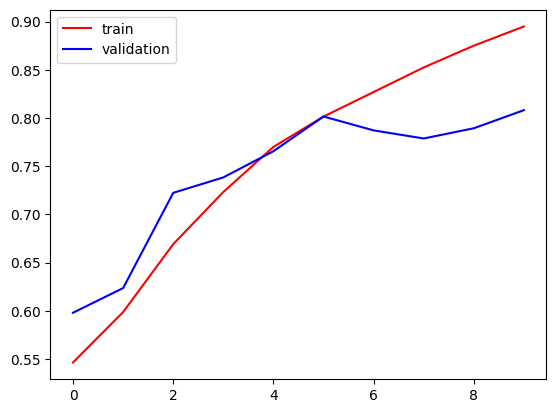

In [ ]:
   import matplotlib.pyplot as plt
   plt.plot(history.history['accuracy'],color='red',label='train')
   plt.plot(history.history['val_accuracy'],color='blue',label='validation')
   plt.legend()
   plt.show()

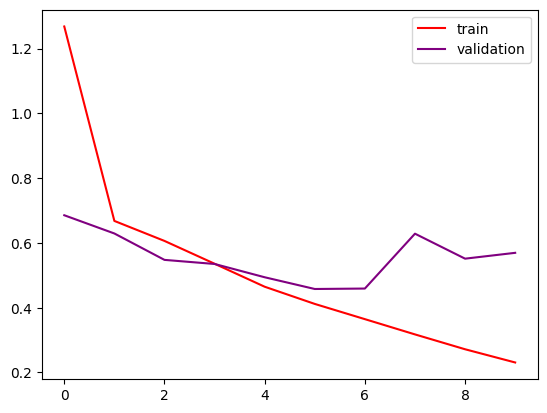

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='purple',label= 'validation')
plt.legend()
plt.show()

- here NN is overfitting

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/yeotan1.jpg')

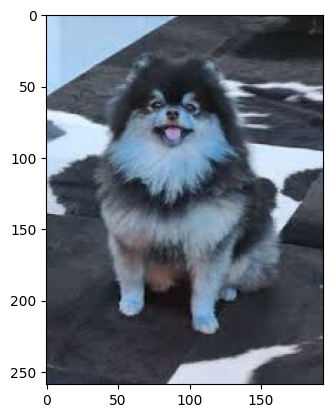

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(259, 194, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.83551913]], dtype=float32)